In [1]:
import csv
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from mpl_toolkits import mplot3d
from numpy import set_printoptions
from numpy import absolute
from numpy import mean
from numpy import std

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn import model_selection

from sklearn.metrics import classification_report
    
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import get_test_data
import seaborn as sns
%matplotlib inline

In [2]:
prosody_data = pd.read_csv('prosodic_features_M2.csv ')

In [3]:
prosody_data.head()

,Row Labels,duration,energy,power,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,...,NoFillers,Friendly,Paused,EngagingTone,StructuredAnswers,Calm,NotStressed,Focused,Authentic,NotAwkward
0,P01,34.186796,0.011510,0.000333,78.064294,340.516454,129.307639,25.242104,176.176383,121.943026,...,3.771665,5.254784,5.800468,5.147909,4.891580,5.351075,5.350760,5.845226,5.610513,5.477534
1,P03,89.165042,0.030218,0.000332,70.536185,400.408060,128.747442,64.528996,298.947756,97.570208,...,3.332458,6.500329,4.791550,5.621231,3.912199,4.476537,5.521215,5.549829,6.014960,4.923550
2,P04,47.795525,0.006202,0.000122,74.847180,359.197092,137.312149,43.985296,272.751359,121.718841,...,3.111445,5.369884,5.177447,4.392736,4.688379,5.065190,5.566084,5.324136,5.658364,4.452909
3,P05,30.842617,0.002352,0.000071,79.266129,311.060876,122.560903,28.550343,162.899076,114.627425,...,5.881741,5.649119,5.886326,4.695523,5.582514,6.130488,5.916373,6.322086,6.020070,5.629838
4,P06,81.745013,0.003205,0.000040,73.461743,355.214131,107.848640,23.362177,124.561066,101.222895,...,3.920329,4.495375,5.027823,4.261988,4.826245,5.828977,5.824390,5.619420,5.371858,5.295977


In [4]:
prosody_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 74 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Row Labels         136 non-null    object 
 1   duration           136 non-null    float64
 2   energy             136 non-null    float64
 3   power              136 non-null    float64
 4   min_pitch          136 non-null    float64
 5   max_pitch          136 non-null    float64
 6   mean_pitch         136 non-null    float64
 7   pitch_sd           136 non-null    float64
 8   pitch_abs          136 non-null    float64
 9   pitch_quant        136 non-null    float64
 10  pitchUvsVRatio     136 non-null    float64
 11  Time:8             136 non-null    float64
 12  iDifference        136 non-null    float64
 13  diffPitchMaxMin    136 non-null    float64
 14  diffPitchMaxMean   136 non-null    float64
 15  diffPitchMaxMode   136 non-null    float64
 16  intensityMin       136 non

In [5]:
prosody_data.describe()

,duration,energy,power,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,pitchUvsVRatio,...,NoFillers,Friendly,Paused,EngagingTone,StructuredAnswers,Calm,NotStressed,Focused,Authentic,NotAwkward
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,...,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,57.201539,0.010119,0.000159,74.356906,365.209221,169.242881,42.009550,246.886862,163.655634,1.193068,...,4.330164,5.428758,5.601117,4.834528,4.740523,5.396404,5.420034,5.645309,5.892097,4.949472
std,25.020621,0.009567,0.000113,5.020964,28.116824,41.204481,12.004259,66.659868,45.996138,0.672061,...,0.986869,0.763974,0.506430,0.916546,0.692830,0.587771,0.547564,0.489152,0.394748,0.782203
min,20.008654,0.000344,0.000017,65.677083,292.289057,100.085216,19.527561,95.443774,84.022553,0.362657,...,1.412112,3.367100,3.477210,2.289539,2.808731,3.876801,3.861496,4.191806,4.872192,2.585845
25%,36.927556,0.003154,0.000071,71.730017,345.862086,123.752956,34.522436,201.362353,113.562160,0.803205,...,3.753762,4.988128,5.324000,4.340265,4.306155,5.044334,5.067056,5.378795,5.646605,4.455155
50%,50.899187,0.007480,0.000129,73.693814,366.651421,181.081399,40.778655,251.642759,178.079841,1.056822,...,4.229655,5.454238,5.646821,5.011107,4.808708,5.445116,5.498800,5.697688,5.922735,4.955383
75%,75.672201,0.013697,0.000226,75.936399,388.540274,199.754522,47.049624,288.256713,204.350281,1.337123,...,5.002291,6.042685,5.947515,5.463256,5.210984,5.796091,5.769599,5.980886,6.184253,5.438874
max,138.779608,0.063112,0.000602,105.797013,413.363997,240.799891,93.036005,454.485046,240.121629,5.398856,...,6.287097,6.794652,6.512832,6.491799,6.428013,6.654135,6.487857,6.728405,6.632400,6.558692


In [6]:
dA = pd.read_csv('prosodic_features_M2.csv ')
yRH = prosody_data['RecommendHiring']
yF = prosody_data['Friendly']
ySA = prosody_data['StructuredAnswers']
yNS = prosody_data['NotStressed']
#cRH = prosody_data['Hired']
#cF = prosody_data['Friendly_c']
#cSA = prosody_data['StructuredAnswers_c']
#cNS = prosody_data['NotStressed_c']


In [7]:
def drawHistogram(feature_name):
    sns.set_style('whitegrid')
    prosody_data[feature_name].hist(bins=30)
    plt.xlabel(feature_name)

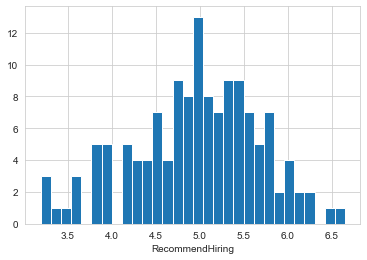

In [8]:
drawHistogram('RecommendHiring')

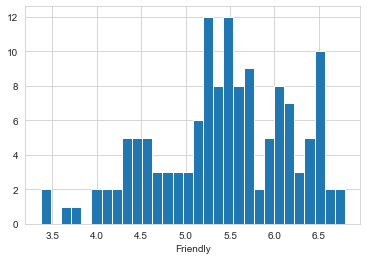

In [9]:
drawHistogram('Friendly')

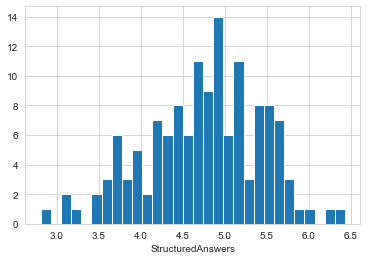

In [10]:
drawHistogram('StructuredAnswers')

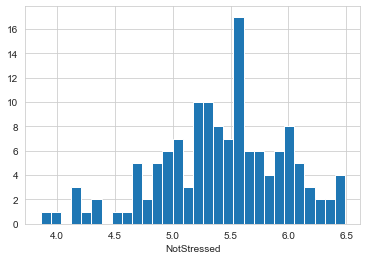

In [11]:
drawHistogram('NotStressed')

In [12]:
cor = dA.corr()
cor.style.background_gradient(cmap="coolwarm").set_precision(2)

,duration,energy,power,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,pitchUvsVRatio,Time:8,iDifference,diffPitchMaxMin,diffPitchMaxMean,diffPitchMaxMode,intensityMin,intensityMax,intensityMean,intensitySD,intensityQuant,diffIntMaxMin,diffIntMaxMean,diffIntMaxMode,avgVal1,avgVal2,avgVal3,avgBand1,avgBand2,avgBand3,fmean1,fmean2,fmean3,f2meanf1,f3meanf1,f1STD,f2STD,f3STD,f2STDf1,f2STDf2,jitter,shimmer,jitterRap,meanPeriod,percentUnvoiced,numVoiceBreaks,speakRate,PercentBreaks,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3,AvgTotRis:3,AvgTotFall:3,numRising,numFall,RecommendHiring,Colleague,Engaged,Excited,SpeakingRate,NoFillers,Friendly,Paused,EngagingTone,StructuredAnswers,Calm,NotStressed,Focused,Authentic,NotAwkward
duration,1.00,0.59,0.23,-0.30,0.42,-0.23,0.01,-0.15,-0.25,0.06,1.00,-0.09,0.46,0.51,0.50,-0.09,0.45,0.28,0.30,0.23,0.47,0.49,0.44,-0.14,-0.22,-0.03,-0.13,-0.12,-0.14,-0.14,-0.22,-0.03,0.02,0.14,0.10,0.31,0.13,0.11,-0.01,-0.02,0.03,-0.05,0.23,0.09,0.94,-0.67,0.28,0.97,0.37,0.10,0.98,0.93,0.57,0.57,-0.02,0.04,0.95,0.86,0.04,-0.17,0.22,0.18,-0.12,-0.31,-0.00,-0.62,0.09,-0.37,0.05,0.14,-0.05,0.05,0.10
energy,0.59,1.00,0.85,-0.02,0.36,-0.18,-0.10,-0.07,-0.20,-0.19,0.59,-0.04,0.35,0.42,0.42,0.07,0.78,0.77,0.74,0.68,0.75,0.32,0.41,-0.29,-0.25,-0.17,-0.38,-0.33,-0.29,-0.29,-0.25,-0.17,0.19,0.24,-0.02,0.26,0.03,0.20,0.06,-0.17,-0.23,-0.20,0.19,-0.18,0.50,-0.53,-0.08,0.53,0.27,0.15,0.61,0.50,0.43,0.39,0.01,-0.02,0.53,0.47,0.22,0.10,0.38,0.41,0.15,-0.12,0.25,-0.44,0.41,-0.21,-0.04,0.17,0.13,0.24,0.24
power,0.23,0.85,1.00,0.12,0.33,-0.08,-0.12,0.02,-0.11,-0.30,0.23,0.03,0.29,0.30,0.31,0.20,0.82,0.91,0.81,0.84,0.76,0.15,0.28,-0.38,-0.27,-0.27,-0.52,-0.46,-0.36,-0.38,-0.27,-0.27,0.30,0.30,-0.16,0.17,-0.05,0.29,0.16,-0.20,-0.34,-0.24,0.10,-0.35,0.17,-0.39,-0.28,0.20,0.13,0.09,0.25,0.17,0.30,0.23,0.04,-0.02,0.19,0.20,0.32,0.27,0.42,0.49,0.31,-0.03,0.35,-0.18,0.54,0.01,-0.10,0.12,0.22,0.28,0.32
min_pitch,-0.30,-0.02,0.12,1.00,-0.17,0.25,-0.22,-0.14,0.25,-0.14,-0.30,0.01,-0.34,-0.36,-0.35,-0.08,0.08,0.11,0.18,0.06,0.10,-0.02,0.06,0.12,0.17,0.11,0.04,-0.02,0.02,0.12,0.17,0.11,-0.05,-0.08,-0.04,-0.08,-0.13,-0.02,-0.11,-0.21,-0.34,-0.19,-0.20,-0.12,-0.38,0.21,-0.29,-0.33,-0.04,0.08,-0.28,-0.38,-0.34,-0.36,-0.15,-0.27,-0.33,-0.42,-0.04,0.01,0.00,0.03,0.16,0.06,0.04,0.15,0.05,0.00,-0.16,-0.16,0.01,0.06,-0.11
max_pitch,0.42,0.36,0.33,-0.17,1.00,0.32,0.36,0.36,0.28,-0.09,0.42,0.22,0.99,0.36,0.33,0.10,0.47,0.43,0.30,0.42,0.44,0.25,0.23,-0.21,-0.09,-0.03,-0.36,-0.31,-0.20,-0.21,-0.09,-0.03,0.19,0.21,-0.27,-0.06,-0.23,0.24,0.08,0.05,-0.28,0.02,-0.28,-0.20,0.40,-0.49,-0.03,0.42,0.19,0.08,0.41,0.41,0.50,0.50,0.38,0.26,0.39,0.45,0.22,0.20,0.32,0.35,0.09,-0.17,0.33,-0.13,0.36,-0.06,-0.12,0.07,0.01,0.27,0.15
mean_pitch,-0.23,-0.18,-0.08,0.25,0.32,1.00,0.27,0.51,0.99,-0.26,-0.23,0.19,0.26,-0.77,-0.78,-0.19,-0.01,-0.01,-0.04,0.02,0.04,0.00,-0.03,0.02,0.41,0.26,-0.19,-0.01,0.03,0.02,0.41,0.26,0.23,0.10,-0.45,-0.60,-0.65,0.04,-0.18,-0.10,-0.57,-0.08,-0.98,-0.38,-0.32,0.01,-0.47,-0.25,-0.04,0.04,-0.21,-0.29,-0.47,-0.47,0.31,-0.02,-0.27,-0.31,0.15,0.34,0.16,0.31,0.16,0.07,0.48,0.33,0.25,0.18,-0.31,-0.19,0.10,0.30,-0.04
pitch_sd,0.01,-0.10,-0.12,-0.22,0.36,0.27,1.00,0.66,0.24,0.55,0.01,0.25,0.38,-0.03,-0.02,0.00,-0.03,-0.13,-0.17,-0.16,-0.03,0.18,0.15,0.11,0.22,0.25,0.17,0.11,0.19,0.11,0.22,0.25,-0.01,0.00,0.11,-0.17,-0.05,-0.22,-0.21,0.75,0.31,0.75,-0.28,0.38,0.08,0.23,0.47,-0.04,0.25,0.25,0.05,0.10,0.26,0.28,0.84,0.86,-0.02,0.20,-0.15,-0.02,-0.10,-0.12,-0.18,-0.10,0.07,0.13,-0.12,-0.06,-0.08,-0.03,-0.21,-0.05,-0.14
pitch_abs,-0.15,-0.07,0.02,-0.14,0.36,0.51,0.66,1.00,0.50,-0.12,-0.15,0.27,0.37,-0.26,-0.27,0.10,0.03,0.10,-0.05,0.21,0.01,-0.11,-0.20,-0.22,0.01,0.03,-0.29,-0.18,-0.12,-0.22,0.01,0.03,0.28,0.28,-0.34,-0.41,-0.38,0.06,0.02,0.45,-0.05,0.44,-0.50,-0.26,0.00,-0.02,-0.12,-0.10,-0.16,-0.19,-0.16,0.04,0.07,0.08,0.82,0.67,-0.04,0.12,0.18,0.30,0.18,0.23,0.12,-0.04,0.32,0.18,0.17,0.25,-0.18,-0.06,0.

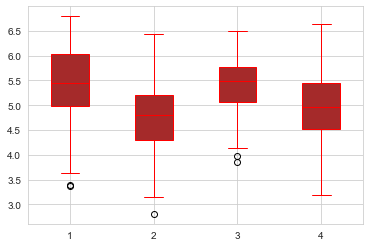

In [13]:
import matplotlib.pyplot as plt

def box_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
fig, ax = plt.subplots()
box_plot([yF,ySA,yNS,yRH], 'red', 'brown')
#ax.set(y='avgBand1')
plt.show()

import matplotlib.pyplot as plt

def box_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
fig, ax = plt.subplots()
box_plot([ySA,yRH], 'red', 'brown')
#ax.set(y='avgBand1')
plt.show()

In [14]:
ranks = {}
from sklearn.preprocessing import MinMaxScaler
 
def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    #ranks = map(lambda x: round(x, 5), ranks)
    return dict(zip(names, ranks ))

# Feature Selection Using Kbest

In [15]:

def select_feature_kbest(prosody_data_y):
    array =  prosody_data.values

    X = prosody_data_X
    Y = prosody_data_y
    # feature extraction
    kbest_test = SelectKBest(score_func=f_classif, k=4)
    fit = kbest_test.fit(X, Y)
    # summarize scores
    set_printoptions(precision=3)
    #print(fit.scores_)
    features = fit.transform(X)
    # summarize selected features
    #print(features[0:5,:])

    ranks["kbest"] = rank_to_dict(np.abs(fit.scores_), prosody_data_X)
    rankDict = {}
    rankDict = ranks["kbest"]
    return rankDict


# Feature Selection Using Ridge Regression

In [16]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
# load the dataset
def select_feature_ridge(prosody_data_y):
    array = prosody_data.values
    X=prosody_data_X
    y=prosody_data_y
    # define model
    ridge_model = Ridge(alpha=1.0)
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(ridge_model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    scores = absolute(scores)
    print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))
    print(scores)
    
    ranks["ridge"] = rank_to_dict(np.abs(scores), prosody_data_X)
    rankDict = {}
    rankDict = ranks["ridge"]
    return rankDict

# Feature Selection Using Lasso

In [17]:
from sklearn.linear_model import Lasso 

def select_feature_lasso(prosody_data_y):
    array =  prosody_data.values

    X = prosody_data_X
    y = prosody_data_y
    
    lasso = Lasso(alpha=.5)
    lasso.fit(X, y)

    cross_val_score(lasso, prosody_data_X , prosody_data_y,cv=3)

    ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), prosody_data_X)
    rankDict = {}
    rankDict = ranks['Lasso']
    return rankDict

# Making arrays of Top 10 20 30 Features

In [18]:
def select_features(rankDict):
    selectedFeatures = []

    selectedFeatures = dict(sorted(rankDict.items(), key=lambda item: item[1],reverse=True))


    selectedFeatures_10 = []
    i=0
    for key in selectedFeatures.keys():
        if(i<10):
            selectedFeatures_10.append(key)
            i+=1

    selectedFeatures_20 = []
    i=0
    for key in selectedFeatures.keys():
        if(i<20):
            selectedFeatures_20.append(key)
            i+=1

    selectedFeatures_30 = []
    i=0
    for key in selectedFeatures.keys():
        if(i<30):
            selectedFeatures_30.append(key)
            i+=1
    return selectedFeatures_10,selectedFeatures_20,selectedFeatures_30


In [19]:
prosody_data_X = prosody_data.drop(['Row Labels','RecommendHiring','Colleague','Engaged','Excited','SpeakingRate','NoFillers','Friendly','Paused','EngagingTone','StructuredAnswers','Calm','NotStressed','Focused','Authentic','NotAwkward'
],axis=1)

# Feature selection for RecommendHirig using KBest

In [20]:
#feature ranks for RecommendHiring
prosody_data_y = yRH
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_RecommendHiring_Kbest=select_feature_kbest(yRH)
print("\nScores of Features for RecommendHiring")
#selectedFeatures_RecommendHiring_Kbest


Scores of Features for RecommendHiring


In [21]:
selectedFeatures_kbest_10_RecommendHiring,selectedFeatures_kbest_20_RecommendHiring,selectedFeatures_kbest_30_RecommendHiring= select_features(selectedFeatures_RecommendHiring_Kbest)

print("Top 10 Selected Features Using kbest for RecommendHiring:",selectedFeatures_kbest_10_RecommendHiring )

print("\n\n\nTop 20 Selected Features Using kbest for RecommendHiring:",selectedFeatures_kbest_20_RecommendHiring )

print("\n\n\nTop 30 Selected Features Using kbest for RecommendHiring:",selectedFeatures_kbest_30_RecommendHiring )

Top 10 Selected Features Using kbest for RecommendHiring: ['intensitySD', 'diffPitchMaxMin', 'numFall', 'diffPitchMaxMode', 'diffIntMaxMode', 'max_pitch', 'diffPitchMaxMean', 'pitch_quant', 'jitterRap', 'f3STD']



Top 20 Selected Features Using kbest for RecommendHiring: ['intensitySD', 'diffPitchMaxMin', 'numFall', 'diffPitchMaxMode', 'diffIntMaxMode', 'max_pitch', 'diffPitchMaxMean', 'pitch_quant', 'jitterRap', 'f3STD', 'jitter', 'f2STDf1', 'shimmer', 'mean_pitch', 'avgBand2', 'avgVal2', 'fmean2', 'AvgTotFall:3', 'AvgTotRis:3', 'pitchUvsVRatio']



Top 30 Selected Features Using kbest for RecommendHiring: ['intensitySD', 'diffPitchMaxMin', 'numFall', 'diffPitchMaxMode', 'diffIntMaxMode', 'max_pitch', 'diffPitchMaxMean', 'pitch_quant', 'jitterRap', 'f3STD', 'jitter', 'f2STDf1', 'shimmer', 'mean_pitch', 'avgBand2', 'avgVal2', 'fmean2', 'AvgTotFall:3', 'AvgTotRis:3', 'pitchUvsVRatio', 'MaxFalling:3', 'PercentBreaks', 'iInterval', 'numVoiceBreaks', 'pitch_abs', 'duration', 'Time:8', 'f3

# Feature selection for Friendly using KBest

In [22]:
#feature ranks for friendly
prosody_data_y = yF
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_Friendly_Kbest=select_feature_kbest(yF)
print("\nScores of Features for Friendly")
#selectedFeatures_Friendly_Kbest


Scores of Features for Friendly


In [23]:
selectedFeatures_kbest_10_Friendly,selectedFeatures_kbest_20_Friendly,selectedFeatures_kbest_30_Friendly= select_features(selectedFeatures_Friendly_Kbest)

print("Top 10 Selected Features Using kbest for friendly:",selectedFeatures_kbest_10_Friendly )

print("\n\n\nTop 20 Selected Features Using kbest for friendly:",selectedFeatures_kbest_20_Friendly )

print("\n\n\nTop 30 Selected Features Using kbest for friendly:",selectedFeatures_kbest_30_Friendly )

Top 10 Selected Features Using kbest for friendly: ['pitchUvsVRatio', 'iDifference', 'intensityMin', 'jitter', 'meanPeriod', 'percentUnvoiced', 'AvgTotFall:3', 'jitterRap', 'min_pitch', 'avgDurPause']



Top 20 Selected Features Using kbest for friendly: ['pitchUvsVRatio', 'iDifference', 'intensityMin', 'jitter', 'meanPeriod', 'percentUnvoiced', 'AvgTotFall:3', 'jitterRap', 'min_pitch', 'avgDurPause', 'fmean3', 'avgVal3', 'diffIntMaxMean', 'pitch_sd', 'pitch_abs', 'diffIntMaxMode', 'f3STD', 'mean_pitch', 'pitch_quant', 'avgBand2']



Top 30 Selected Features Using kbest for friendly: ['pitchUvsVRatio', 'iDifference', 'intensityMin', 'jitter', 'meanPeriod', 'percentUnvoiced', 'AvgTotFall:3', 'jitterRap', 'min_pitch', 'avgDurPause', 'fmean3', 'avgVal3', 'diffIntMaxMean', 'pitch_sd', 'pitch_abs', 'diffIntMaxMode', 'f3STD', 'mean_pitch', 'pitch_quant', 'avgBand2', 'diffIntMaxMin', 'intensityMax', 'PercentBreaks', 'shimmer', 'f2meanf1', 'numFall', 'avgBand3', 'intensityMean', 'AvgTotRis:3',

# Feature selection for Not Stressed using KBest

In [24]:
#feature ranks for Stressed
prosody_data_y = yNS
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_NotStressed_Kbest=select_feature_kbest(yNS)
print("\nScores of Features for Not Stressed")
#selectedFeatures_NotStressed


Scores of Features for Not Stressed


C:\Users\Anagha\anaconda3\envs\tf\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
C:\Users\Anagha\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Anagha\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [25]:
selectedFeatures_kbest_10_NotStressed,selectedFeatures_kbest_20_NotStressed,selectedFeatures_kbest_30_NotStressed= select_features(selectedFeatures_NotStressed_Kbest)

print("Top 10 Selected Features Using kbest:",selectedFeatures_kbest_10_NotStressed )

print("\n\n\nTop 20 Selected Features Using kbest:",selectedFeatures_kbest_20_NotStressed )

print("\n\n\nTop 30 Selected Features Using kbest:",selectedFeatures_kbest_30_NotStressed )

Top 10 Selected Features Using kbest: ['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio']



Top 20 Selected Features Using kbest: ['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant']



Top 30 Selected Features Using kbest: ['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal1', 'avgVal2', 'avgVal3', 'avgBand1', 'avgBand2', 'avgBand3', 'fmean1']


# Feature selection for Structured Answer using KBest

In [26]:
#feature ranks for Structured Answer
prosody_data_y = ySA
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_StructuredAnswer_Kbest=select_feature_kbest(ySA)
print("\nScores of Features for Not Structured Answer")
#selectedFeatures_StructuredAnswer_Kbest


Scores of Features for Not Structured Answer


C:\Users\Anagha\anaconda3\envs\tf\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
C:\Users\Anagha\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Anagha\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [27]:
selectedFeatures_kbest_10_StructuredAnswer,selectedFeatures_kbest_20_StructuredAnswer,selectedFeatures_kbest_30_StructuredAnswer= select_features(selectedFeatures_StructuredAnswer_Kbest)

print("Top 10 Selected Features Using kbest:",selectedFeatures_kbest_10_StructuredAnswer )

print("\n\n\nTop 20 Selected Features Using kbest:",selectedFeatures_kbest_20_StructuredAnswer )

print("\n\n\nTop 30 Selected Features Using kbest:",selectedFeatures_kbest_30_StructuredAnswer )

Top 10 Selected Features Using kbest: ['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio']



Top 20 Selected Features Using kbest: ['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant']



Top 30 Selected Features Using kbest: ['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal1', 'avgVal2', 'avgVal3', 'avgBand1', 'avgBand2', 'avgBand3', 'fmean1']


# Feature selection for RecommendHiring using Ridge

In [28]:
#feature ranks for RecommendHiring ridge
prosody_data_y = yRH
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_RecommendHiring_Ridge=select_feature_ridge(yRH)
print("\nScores of Features for RecommendHiring")
#selectedFeatures_RecommendHiring_Ridge

Mean MAE: 0.536 (0.099)
[0.52  0.703 0.506 0.501 0.488 0.601 0.545 0.454 0.338 0.507 0.696 0.568
 0.575 0.547 0.301 0.57  0.54  0.406 0.514 0.784 0.435 0.491 0.503 0.643
 0.612 0.604 0.593 0.58  0.499 0.465]

Scores of Features for RecommendHiring


In [29]:
selectedFeatures_ridge_10_RecommendHiring,selectedFeatures_ridge_20_RecommendHiring,selectedFeatures_ridge_30_RecommendHiring= select_features(selectedFeatures_RecommendHiring_Ridge)

print("Top 10 Selected Features For RecommendHiring Using ridge :",selectedFeatures_ridge_10_RecommendHiring )

print("\n\n\nTop 20 Selected For RecommendHiring Features Using ridge:",selectedFeatures_ridge_20_RecommendHiring )

print("\n\n\nTop 30 Selected For RecommendHiring Features Using ridge:",selectedFeatures_ridge_30_RecommendHiring )

Top 10 Selected Features For RecommendHiring Using ridge : ['intensityQuant', 'energy', 'Time:8', 'avgVal1', 'avgVal2', 'avgVal3', 'mean_pitch', 'avgBand1', 'avgBand2', 'diffPitchMaxMin']



Top 20 Selected For RecommendHiring Features Using ridge: ['intensityQuant', 'energy', 'Time:8', 'avgVal1', 'avgVal2', 'avgVal3', 'mean_pitch', 'avgBand1', 'avgBand2', 'diffPitchMaxMin', 'intensityMin', 'iDifference', 'diffPitchMaxMean', 'pitch_sd', 'intensityMax', 'duration', 'intensitySD', 'pitchUvsVRatio', 'power', 'diffIntMaxMode']



Top 30 Selected For RecommendHiring Features Using ridge: ['intensityQuant', 'energy', 'Time:8', 'avgVal1', 'avgVal2', 'avgVal3', 'mean_pitch', 'avgBand1', 'avgBand2', 'diffPitchMaxMin', 'intensityMin', 'iDifference', 'diffPitchMaxMean', 'pitch_sd', 'intensityMax', 'duration', 'intensitySD', 'pitchUvsVRatio', 'power', 'diffIntMaxMode', 'min_pitch', 'avgBand3', 'diffIntMaxMean', 'max_pitch', 'fmean1', 'pitch_abs', 'diffIntMaxMin', 'intensityMean', 'pitch_quant', 'd

# Feature selection for Friendly using Ridge

In [30]:
#feature ranks for friendly ridge
prosody_data_y = yF
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_Friendly_Ridge=select_feature_ridge(yF)
print("\nScores of Features for Friendly")
#selectedFeatures_Friendly_Ridge

Mean MAE: 0.530 (0.109)
[0.612 0.672 0.441 0.462 0.436 0.482 0.397 0.621 0.576 0.517 0.468 0.659
 0.535 0.444 0.357 0.346 0.521 0.374 0.726 0.708 0.42  0.603 0.587 0.5
 0.587 0.768 0.558 0.585 0.48  0.47 ]

Scores of Features for Friendly


In [31]:
selectedFeatures_ridge_10_Friendly,selectedFeatures_ridge_20_Friendly,selectedFeatures_ridge_30_Friendly= select_features(selectedFeatures_Friendly_Ridge)

print("Top 10 Selected Features For Friendly Using ridge :",selectedFeatures_ridge_10_Friendly )

print("\n\n\nTop 20 Selected For Friendly Features Using ridge:",selectedFeatures_ridge_20_Friendly )

print("\n\n\nTop 30 Selected For Friendly Features Using ridge:",selectedFeatures_ridge_30_Friendly )

Top 10 Selected Features For Friendly Using ridge : ['avgVal3', 'intensitySD', 'intensityQuant', 'energy', 'iDifference', 'pitch_abs', 'duration', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal2']



Top 20 Selected For Friendly Features Using ridge: ['avgVal3', 'intensitySD', 'intensityQuant', 'energy', 'iDifference', 'pitch_abs', 'duration', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal2', 'avgBand2', 'pitch_quant', 'avgBand1', 'diffPitchMaxMin', 'intensityMax', 'pitchUvsVRatio', 'avgVal1', 'mean_pitch', 'avgBand3', 'fmean1']



Top 30 Selected For Friendly Features Using ridge: ['avgVal3', 'intensitySD', 'intensityQuant', 'energy', 'iDifference', 'pitch_abs', 'duration', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal2', 'avgBand2', 'pitch_quant', 'avgBand1', 'diffPitchMaxMin', 'intensityMax', 'pitchUvsVRatio', 'avgVal1', 'mean_pitch', 'avgBand3', 'fmean1', 'Time:8', 'min_pitch', 'diffPitchMaxMean', 'power', 'max_pitch', 'diffIntMaxMin', 'pitch_sd', 'intensityMean', 'diffPitchMaxMode', 'inte

# Feature selection for Not Stressed using Ridge

In [32]:
#feature ranks for Not Stressed ridge
prosody_data_y = yNS
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_NotStressed_Ridge=select_feature_ridge(yNS)
print("\nScores of Features for Not Stressed")
#selectedFeatures_NotStressed_Ridge

Mean MAE: 0.489 (0.089)
[0.625 0.561 0.524 0.386 0.421 0.389 0.387 0.572 0.484 0.456 0.654 0.533
 0.44  0.396 0.351 0.535 0.505 0.477 0.636 0.391 0.61  0.548 0.559 0.564
 0.419 0.306 0.445 0.483 0.47  0.556]

Scores of Features for Not Stressed


In [33]:
selectedFeatures_ridge_10_NotStressed,selectedFeatures_ridge_20_NotStressed,selectedFeatures_ridge_30_NotStressed= select_features(selectedFeatures_NotStressed_Ridge)

print("Top 10 Selected Features Using ridge for Not Stressed:",selectedFeatures_ridge_10_NotStressed )

print("\n\n\nTop 20 Selected Features Using for Not Stressed:",selectedFeatures_ridge_20_NotStressed )

print("\n\n\nTop 30 Selected Features Using for Not Stressed:",selectedFeatures_ridge_30_NotStressed)

Top 10 Selected Features Using ridge for Not Stressed: ['Time:8', 'intensitySD', 'duration', 'diffIntMaxMin', 'pitch_abs', 'avgVal1', 'energy', 'diffIntMaxMode', 'fmean1', 'diffIntMaxMean']



Top 20 Selected Features Using for Not Stressed: ['Time:8', 'intensitySD', 'duration', 'diffIntMaxMin', 'pitch_abs', 'avgVal1', 'energy', 'diffIntMaxMode', 'fmean1', 'diffIntMaxMean', 'intensityMin', 'iDifference', 'power', 'intensityMax', 'pitch_quant', 'avgBand2', 'intensityMean', 'avgBand3', 'pitchUvsVRatio', 'avgBand1']



Top 30 Selected Features Using for Not Stressed: ['Time:8', 'intensitySD', 'duration', 'diffIntMaxMin', 'pitch_abs', 'avgVal1', 'energy', 'diffIntMaxMode', 'fmean1', 'diffIntMaxMean', 'intensityMin', 'iDifference', 'power', 'intensityMax', 'pitch_quant', 'avgBand2', 'intensityMean', 'avgBand3', 'pitchUvsVRatio', 'avgBand1', 'diffPitchMaxMin', 'max_pitch', 'avgVal2', 'diffPitchMaxMean', 'intensityQuant', 'mean_pitch', 'pitch_sd', 'min_pitch', 'diffPitchMaxMode', 'avgVal3']


# Feature Selection For Structured Answer using Ridge

#feature ranks for StructuredAnswer ridge
prosody_data_y = ySA
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_StructuredAnswer_Ridge=select_feature_ridge(ySA)
print("\nScores of Features for Structured Answer")
#selectedFeatures_StructuredAnswer_Ridge


In [34]:
selectedFeatures_kbest_10_StructuredAnswer,selectedFeatures_kbest_20_StructuredAnswer,selectedFeatures_kbest_30_StructuredAnswer= select_features(selectedFeatures_StructuredAnswer_Kbest)

print("Top 10 Selected Features Using kbest:",selectedFeatures_kbest_10_StructuredAnswer )

print("\n\n\nTop 20 Selected Features Using kbest:",selectedFeatures_kbest_20_StructuredAnswer )

print("\n\n\nTop 30 Selected Features Using kbest:",selectedFeatures_kbest_30_StructuredAnswer )

Top 10 Selected Features Using kbest: ['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio']



Top 20 Selected Features Using kbest: ['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant']



Top 30 Selected Features Using kbest: ['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal1', 'avgVal2', 'avgVal3', 'avgBand1', 'avgBand2', 'avgBand3', 'fmean1']


# Feature selection for RecommendHiring using Lasso

In [35]:
#feature ranks for RecommendHiring using Lasso
prosody_data_y = yRH
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_RecommendHiring_Lasso=select_feature_lasso(yRH)
print("\nScores of Features for RecommendHiring using Lasso")
#selectedFeatures_RecommendHiring_Lasso


Scores of Features for RecommendHiring using Lasso


In [36]:
selectedFeatures_lasso_10_RecommendHiring,selectedFeatures_lasso_20_RecommendHiring,selectedFeatures_lasso_30_RecommendHiring= select_features(selectedFeatures_RecommendHiring_Lasso)

print("Top 10 Selected Features for RecommendHiring Using Lasso:",selectedFeatures_lasso_10_RecommendHiring )

print("\n\n\nTop 20 Selected Features For RecommendHiring Using Lasso:",selectedFeatures_lasso_20_RecommendHiring)

print("\n\n\nTop 30 Selected Features Using For RecommendHiring Using Lasso:",selectedFeatures_lasso_30_RecommendHiring )

Top 10 Selected Features for RecommendHiring Using Lasso: ['TotDurPause:3', 'avgBand1', 'MaxFalling:3', 'iDifference', 'pitch_sd', 'fmean3', 'diffPitchMaxMode', 'f2STD', 'pitch_abs', 'avgBand3']



Top 20 Selected Features For RecommendHiring Using Lasso: ['TotDurPause:3', 'avgBand1', 'MaxFalling:3', 'iDifference', 'pitch_sd', 'fmean3', 'diffPitchMaxMode', 'f2STD', 'pitch_abs', 'avgBand3', 'f3STD', 'numFall', 'fmean2', 'avgVal2', 'duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch']



Top 30 Selected Features Using For RecommendHiring Using Lasso: ['TotDurPause:3', 'avgBand1', 'MaxFalling:3', 'iDifference', 'pitch_sd', 'fmean3', 'diffPitchMaxMode', 'f2STD', 'pitch_abs', 'avgBand3', 'f3STD', 'numFall', 'fmean2', 'avgVal2', 'duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'diffPitchMaxMin', 'diffPitchMaxMean', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant']


# Feature selection for Friendly using Lasso

In [37]:
#feature ranks for friendly using Lasso
prosody_data_y = yF
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_Friendly_Lasso=select_feature_lasso(yF)
print("\nScores of Features for Friendly using Lasso")
selectedFeatures_Friendly_Lasso


Scores of Features for Friendly using Lasso


C:\Users\Anagha\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006932741257458019, tolerance: 0.005408982335627771
  model = cd_fast.enet_coordinate_descent(


{'duration': 0.0,
 'energy': 0.0,
 'power': 0.0,
 'min_pitch': 0.0,
 'max_pitch': 0.0,
 'mean_pitch': 1.0,
 'pitch_sd': 0.0,
 'pitch_abs': 0.011569269205810112,
 'pitch_quant': 0.0,
 'pitchUvsVRatio': 0.0,
 'Time:8': 0.0,
 'iDifference': 0.0,
 'diffPitchMaxMin': 0.06492100741377467,
 'diffPitchMaxMean': 0.0,
 'diffPitchMaxMode': 0.42150838375811084,
 'intensityMin': 0.0,
 'intensityMax': 0.0,
 'intensityMean': 0.0,
 'intensitySD': 0.0,
 'intensityQuant': 0.0,
 'diffIntMaxMin': 0.3272419534455998,
 'diffIntMaxMean': 0.0,
 'diffIntMaxMode': 0.0,
 'avgVal1': 0.05409917235761944,
 'avgVal2': 0.0,
 'avgVal3': 0.0,
 'avgBand1': 0.5523000215537012,
 'avgBand2': 0.0,
 'avgBand3': 0.04002053804868168,
 'fmean1': 0.005651389910170253,
 'fmean2': 0.0,
 'fmean3': 0.2304734693833338,
 'f2meanf1': 0.0,
 'f3meanf1': 0.0,
 'f1STD': 0.0,
 'f2STD': 0.16364994183061218,
 'f3STD': 0.261295525977745,
 'f2STDf1': 0.0,
 'f2STDf2': 0.0,
 'jitter': 0.0,
 'shimmer': 0.0,
 'jitterRap': 0.0,
 'meanPeriod': 0.0,
 

In [38]:
selectedFeatures_lasso_10_Friendly,selectedFeatures_lasso_20_Friendly,selectedFeatures_lasso_30_Friendly= select_features(selectedFeatures_Friendly_Lasso)

print("Top 10 Selected Features for Friendly Using Lasso:",selectedFeatures_lasso_10_Friendly )

print("\n\n\nTop 20 Selected Features For Friendly Using Lasso:",selectedFeatures_lasso_20_Friendly)

print("\n\n\nTop 30 Selected Features Using For Friendly Using Lasso:",selectedFeatures_lasso_30_Friendly )

Top 10 Selected Features for Friendly Using Lasso: ['mean_pitch', 'avgBand1', 'diffPitchMaxMode', 'numVoiceBreaks', 'diffIntMaxMin', 'MaxFalling:3', 'f3STD', 'fmean3', 'MaxRising:3', 'f2STD']



Top 20 Selected Features For Friendly Using Lasso: ['mean_pitch', 'avgBand1', 'diffPitchMaxMode', 'numVoiceBreaks', 'diffIntMaxMin', 'MaxFalling:3', 'f3STD', 'fmean3', 'MaxRising:3', 'f2STD', 'diffPitchMaxMin', 'avgVal1', 'avgBand3', 'pitch_abs', 'numFall', 'fmean1', 'duration', 'energy', 'power', 'min_pitch']



Top 30 Selected Features Using For Friendly Using Lasso: ['mean_pitch', 'avgBand1', 'diffPitchMaxMode', 'numVoiceBreaks', 'diffIntMaxMin', 'MaxFalling:3', 'f3STD', 'fmean3', 'MaxRising:3', 'f2STD', 'diffPitchMaxMin', 'avgVal1', 'avgBand3', 'pitch_abs', 'numFall', 'fmean1', 'duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'pitch_sd', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMean', 'intensityMin', 'intensityMax', 'intensityMean']


# Feature Selection For Not Stressed Using Lasso

In [39]:
#feature ranks for Not Stressed using Lasso
prosody_data_y = yNS
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_NotStressed_Lasso=select_feature_lasso(yNS)
print("\nScores of Features for Not Stressed using Lasso")
#selectedFeatures_NotStressed_Lasso


Scores of Features for Not Stressed using Lasso


In [40]:
selectedFeatures_lasso_10_NotStressed,selectedFeatures_lasso_20_NotStressed,selectedFeatures_lasso_30_NotStressed= select_features(selectedFeatures_NotStressed_Lasso)

print("Top 10 Selected Features for NotStressed Using Lasso:",selectedFeatures_lasso_10_NotStressed )

print("\n\n\nTop 20 Selected Features For NotStressed Using Lasso:",selectedFeatures_lasso_20_NotStressed)

print("\n\n\nTop 30 Selected Features Using For NotStressed Using Lasso:",selectedFeatures_lasso_30_NotStressed )

Top 10 Selected Features for NotStressed Using Lasso: ['iDifference', 'f1STD', 'avgBand1', 'fmean1', 'pitch_quant', 'f3STD', 'iInterval', 'MaxRising:3', 'max_pitch', 'pitch_abs']



Top 20 Selected Features For NotStressed Using Lasso: ['iDifference', 'f1STD', 'avgBand1', 'fmean1', 'pitch_quant', 'f3STD', 'iInterval', 'MaxRising:3', 'max_pitch', 'pitch_abs', 'avgBand3', 'MaxFalling:3', 'avgBand2', 'fmean3', 'avgVal1', 'numFall', 'f2STD', 'duration', 'energy', 'power']



Top 30 Selected Features Using For NotStressed Using Lasso: ['iDifference', 'f1STD', 'avgBand1', 'fmean1', 'pitch_quant', 'f3STD', 'iInterval', 'MaxRising:3', 'max_pitch', 'pitch_abs', 'avgBand3', 'MaxFalling:3', 'avgBand2', 'fmean3', 'avgVal1', 'numFall', 'f2STD', 'duration', 'energy', 'power', 'min_pitch', 'mean_pitch', 'pitch_sd', 'pitchUvsVRatio', 'Time:8', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax']


# Feature Selection For Structured Answer Using Lasso

In [41]:
#feature ranks for Structured Answer using Lasso
prosody_data_y = ySA
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_StructuredAnswer_Lasso=select_feature_lasso(ySA)
print("\nScores of Features for Structured Answer using Lasso")
#selectedFeatures_StructuredAnswer_Lasso


Scores of Features for Structured Answer using Lasso


In [42]:
selectedFeatures_lasso_10_StructuredAnswer,selectedFeatures_lasso_20_StructuredAnswer,selectedFeatures_lasso_30_StructuredAnswer= select_features(selectedFeatures_StructuredAnswer_Lasso)

print("Top 10 Selected Features for StructuredAnswer Using Lasso:",selectedFeatures_lasso_10_StructuredAnswer )

print("\n\n\nTop 20 Selected Features For StructuredAnswer Using Lasso:",selectedFeatures_lasso_20_StructuredAnswer)

print("\n\n\nTop 30 Selected Features Using For StructuredAnswer Using Lasso:",selectedFeatures_lasso_30_StructuredAnswer )

Top 10 Selected Features for StructuredAnswer Using Lasso: ['TotDurPause:3', 'avgBand1', 'MaxFalling:3', 'iDifference', 'duration', 'f2STD', 'Time:8', 'fmean2', 'pitch_quant', 'MaxRising:3']



Top 20 Selected Features For StructuredAnswer Using Lasso: ['TotDurPause:3', 'avgBand1', 'MaxFalling:3', 'iDifference', 'duration', 'f2STD', 'Time:8', 'fmean2', 'pitch_quant', 'MaxRising:3', 'fmean3', 'pitch_abs', 'avgBand2', 'mean_pitch', 'numFall', 'avgVal2', 'avgBand3', 'energy', 'power', 'min_pitch']



Top 30 Selected Features Using For StructuredAnswer Using Lasso: ['TotDurPause:3', 'avgBand1', 'MaxFalling:3', 'iDifference', 'duration', 'f2STD', 'Time:8', 'fmean2', 'pitch_quant', 'MaxRising:3', 'fmean3', 'pitch_abs', 'avgBand2', 'mean_pitch', 'numFall', 'avgVal2', 'avgBand3', 'energy', 'power', 'min_pitch', 'max_pitch', 'pitch_sd', 'pitchUvsVRatio', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD']


# Applying Regression Models

In [43]:
def Find_Metrics(metricsHead,model_pred,model):
    print(metricsHead)
    kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
   
    mse_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    print("MSE: %.3f (%.3f)" % (mse_results.mean(), mse_results.std()))
    
    print('MSE',metrics.mean_squared_error(y_test,model_pred))
    print('RMSE', mean_squared_error(y_test,model_pred,squared=False))
    
   
    abs_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
    print("MAE: %.3f (%.3f)" % (abs_results.mean(), abs_results.std()))
    
    r2_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='r2')
    print("R^2: %.3f (%.3f)" % (r2_results.mean(), r2_results.std()))


# For RecommendHiring

In [44]:
#get_ipython().run_line_magic('matplotlib', 'inline')
X=prosody_data[selectedFeatures_kbest_10_RecommendHiring]
y=yRH


In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = prosody_data[selectedFeatures_kbest_10_RecommendHiring]
y = yRH
StandardScaler().fit_transform(X.values.reshape(-1,1))
StandardScaler().fit_transform(y.values.reshape(-1,1))
X.head()


,intensitySD,diffPitchMaxMin,numFall,diffPitchMaxMode,diffIntMaxMode,max_pitch,diffPitchMaxMean,pitch_quant,jitterRap,f3STD
0,8.449370,262.452159,2885.361924,218.573428,18.984766,340.516454,211.208815,121.943026,0.012588,393.308871
1,8.351788,329.871875,12286.259430,302.837853,21.983857,400.408060,271.660618,97.570208,0.020100,426.532362
2,7.370694,284.349912,5577.512799,237.478251,18.479062,359.197092,221.884943,121.718841,0.013002,389.776259
3,6.146443,231.794747,2814.617977,196.433451,16.985278,311.060876,188.499974,114.627425,0.013574,398.701767
4,5.156638,281.752387,8272.626109,253.991236,17.897097,355.214131,247.365490,101.222895,0.009942,371.617667


In [96]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X.values)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

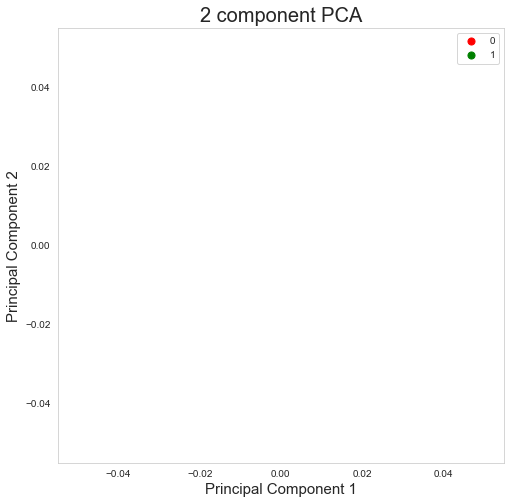

In [95]:
# 2D visualization
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['RecommendHiring'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()



# Applying SVM

In [101]:
from sklearn.svm import SVR

svm_model = SVR()
svm_model.fit(X_train,y_train)
svm_pred = svm_model.predict(X_test)  

Find_Metrics("SVM METRICS",svm_pred,svm_model)

SVM METRICS
MSE: -0.492 (0.122)
MSE 0.5948587321241641
RMSE 0.7712708552280217
MAE: -0.559 (0.077)
R^2: -0.043 (0.159)


# Applying KNN

Text(0, 0.5, 'Error Rate')

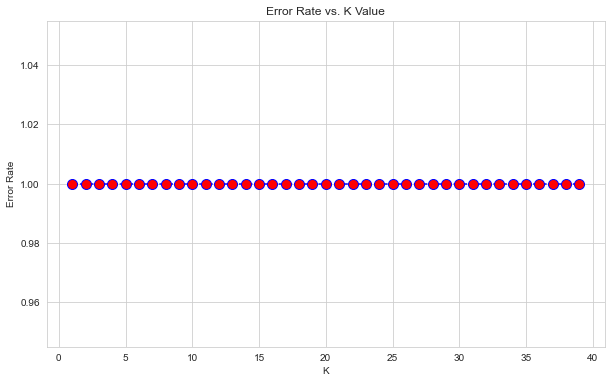

In [46]:
from sklearn.neighbors import KNeighborsRegressor
error_rate = []
for i in range(1,40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title ('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Applying Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression

lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)

Find_Metrics("LR METRICS",lr_pred,lr_model) 


LR METRICS
MSE: -0.437 (0.172)
MSE 0.5850332839042338
RMSE 0.7648746850983067
MAE: -0.530 (0.086)
R^2: 0.079 (0.265)


# For Friendly

In [48]:
#get_ipython().run_line_magic('matplotlib', 'inline')
X=prosody_data[selectedFeatures_kbest_20_Friendly]
y=yF
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [49]:
from sklearn.linear_model import LinearRegression

lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)

Find_Metrics("LR METRICS",lr_pred,lr_model) 


LR METRICS
MSE: -0.410 (0.149)
MSE 0.32590421223538607
RMSE 0.5708802083058985
MAE: -0.521 (0.084)
R^2: 0.234 (0.248)


X=prosody_data[['max_pitch',
 'pitch_sd',
 'pitchUvsVRatio',
 'diffPitchMaxMean',
 'diffPitchMaxMode',
 'intensityMean',
 'intensityQuant',
 'diffIntMaxMean',
 'avgVal1',
 'avgVal3',
 'avgBand1',
 'avgBand3',
 'fmean1',
 'fmean2',
 'f3meanf1',
 'f1STD',
 'f2STDf1',
 'jitter',
 'jitterRap',
 'percentUnvoiced',
 'PercentBreaks',
 'numPause',
 'avgDurPause',
 'AvgTotRis:3']]


In [66]:

X=prosody_data[['max_pitch',
 'pitch_sd',
 'pitchUvsVRatio',
 'diffPitchMaxMean',
 'diffPitchMaxMode',
 'intensityMean',
 'intensityQuant',
 'diffIntMaxMean',
 'avgVal1',
 'avgVal3',
 'avgBand3',
 'fmean1',
 'fmean2',
 'f3meanf1',
 'f2STDf1',
 'jitter',
 'jitterRap',
 'percentUnvoiced',
 'PercentBreaks',
 'numPause',
 'avgDurPause',
 'AvgTotRis:3','mean_pitch', 'avgBand1','numFall','f1STD','maxDurPause','f2meanf1']]
y=yF
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train,y_train)


pred = regressor.predict(X_test)

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
r2_results = model_selection.cross_val_score(regressor, X, y, cv=kfold, scoring='r2')
print("R^2: %.3f (%.3f)" % (r2_results.mean(), r2_results.std()))
    
Find_Metrics("TR METRICS",pred,regressor) 



R^2: -0.120 (0.548)
TR METRICS
MSE: -0.553 (0.191)
MSE 0.7178550815903142
RMSE 0.847263289414993
MAE: -0.593 (0.109)
R^2: -0.120 (0.548)


In [67]:
X=prosody_data[['max_pitch',
 'pitch_sd',
 'pitchUvsVRatio',
 'diffPitchMaxMean',
 'diffPitchMaxMode',
 'intensityMean',
 'intensityQuant',
 'diffIntMaxMean',
 'avgVal1',
 'avgVal3',
 'avgBand3',
 'fmean1',
 'fmean2',
 'f3meanf1',
 'f2STDf1',
 'jitter',
 'jitterRap',
 'percentUnvoiced',
 'PercentBreaks',
 'numPause',
 'avgDurPause',
 'AvgTotRis:3','mean_pitch', 'avgBand1','numFall','f1STD','maxDurPause','f2meanf1']]
y=yF
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=42)
from sklearn.svm import SVR

svm_model = SVR()

svm_model.fit(X,y)
svm_pred = svm_model.predict(X_test)  

Find_Metrics("SVM METRICS",svm_pred,svm_model)  

SVM METRICS
MSE: -0.530 (0.181)
MSE 0.6747705324325318
RMSE 0.8214441748728466
MAE: -0.583 (0.111)
R^2: 0.060 (0.094)


In [73]:
X=prosody_data[['mean_pitch', 'avgBand1','numFall','f1STD','maxDurPause','f2meanf1']]
y=yF
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=42)
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 
pred = regressor .predict(X_test)  

Find_Metrics("METRICS",pred,regressor)  

METRICS
MSE: -0.327 (0.132)
MSE 0.2301529130983826
RMSE 0.4797425487679643
MAE: -0.464 (0.087)
R^2: 0.370 (0.254)


In [77]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor
# define dataset
X=prosody_data[['mean_pitch', 'avgBand1','numFall','f1STD','maxDurPause','f2meanf1']]
y=yF
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=42)
# define the model
model = BaggingRegressor()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
Find_Metrics("METRICS",yhat,model)  


MAE: -0.473 (0.095)
METRICS
MSE: -0.345 (0.151)
MSE 0.2795783891235863
RMSE 0.5287517273008063
MAE: -0.497 (0.095)
R^2: 0.353 (0.258)
